---
layout: page
title: Decomposição
nav_order: 22
---

[<img src="./colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/icd-ufmg/icd-ufmg.github.io/blob/master/_lessons/22-svd-e-pca)

# Decomposição (SVD e PCA)
{: .no_toc .mb-2 }

Resumo de SVD e entendimento de PCA. Necessita de uma base em álgebra linear.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Entender SVD no escopo de ciência de dados
1. Entender PCA no escopo de ciência de dados
1. Saber fazer uso dos dois (interpretar componentes e fatores)

---
**Sumário**
1. TOC
{:toc}
---

In [1]:
from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (16, 10)

plt.rcParams['axes.axisbelow'] = True 
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 80

In [3]:
plt.style.use('tableau-colorblind10')
plt.ion();

## Introdução

Na álgebra linear, a decomposição em valores singulares ou singular value decomposition (SVD) é a fatoração de uma matriz real ou complexa, com diversas aplicações importantes em processamento de sinais e estatística.

Formalmente, a decomposição em valores singulares de uma matriz m×n real ou complexa X é uma fatoração ou fatorização na forma: 

$$ X = U \Sigma V^{*} $$ 

Aqui, $U$ é a matriz de vetores singulares à direita. $\Sigma$ é uma matriz diagonal com os valores singulares. Por fim, $V^{*}$ é a transposta conjugada dos valores singulares à direita. *Possivelmente você deve estar pensando: "massa, um monte de termo que sei muito pouco sobre"*. Se este é o seu caso, não se preocupe! Vamos tentar focar em uma ideia mais simples, que faria um matemático chorar, para explicar SVD.

Para tal, uma outra forma de escrever tal equação é:

$$ X = U_s V^{t} $$ 

onde, $U_s = U \Sigma$, ou seja, o produto da primeira parte da equação acima. Aqui, $V^{t}$ é simplesmente transposta de $V$. Não vamos nos preocupar com transpostas conjugadas pois vamos trabalhar com números reais.

Em sua forma correta, $ X = U \Sigma V^{*} $, SVD consegue decompor qualquer matriz, $X$, real ou complexa. A decomposição também vai ser complexa, isto é, $U$, $\Sigma$ e $V$ podem conter números complexos. É importante ressaltar este fato para deixar claro que SVD consegue trabalhar no espectrograma complexo caso seja necessário. Fazemos uso da versão modificada aqui, pois conseguimos visualizar o espectro usando a norma dos números complexos, ou seja, um valor real.

### Como entender SVD melhor?

*Começando com vetores*

Vamos voltar para a nossa simplificação acima: $ X = U_s V^{t} $. Agora, vamos definir $U_s$ como um vetor coluna, i.e.,:

\begin{align}
    U_s &= \begin{bmatrix}
           c_{1} \\
           c_{2} \\
           \vdots \\
           c_{n}
         \end{bmatrix}
  \end{align}

Além do mais, vamos também definir $V$ como um outro vetor coluna. Como trabalhamos com $V^t$, teremos a transposta, ou seja, um vetor linha na nossa expressão de SVD. Segue a forma de $V^t$.

\begin{align}
    V^t &= \begin{bmatrix}
           l_{1}, 
           l_{2}, 
           \cdots,
           l_{m}
         \end{bmatrix}
  \end{align}

A nossa expressão então vira:

\begin{align}
    X &= \begin{bmatrix}
           c_{1} \\
           c_{2} \\
           \vdots \\
           c_{n}
         \end{bmatrix}\begin{bmatrix}
           l_{1}, 
           l_{2}, 
           \cdots,
           l_{m}
         \end{bmatrix}
  \end{align}


Observe como o produto de um vetor coluna de tamanho $(n, 1)$ com um outro linha de tamanho $(1, m)$ gera uma matriz de tamanho $(n, m)$. Agora, uma coisa importante deste produto é que o mesmo tem *posto* matricial igual à um. O que isto quer dizer? Que toda linha ou coluna da matriz resultante é, de certa forma, redundante. Pois as outras são uma combinação linear da mesma. Para entender isto observe o produto abaixo.

![](https://dcc.ufmg.br/~flaviovdf/mir/lab08/figs/fig1.png)

Observe como todas as linhas da matriz acima são da forma: $c_i \cdot [ l_1 \cdots l_m]$. Aqui, $i$ é a linha. Desta forma, todas as linhas tem como base o vetor $ [ l_1 \cdots l_m] $, porém, escalados por uma constante diferente $c_i$.

Observe que a escolha de transformar: $U_s$ e $V$ em vetores colunas foi bem arbitrária. Podemos usar outros tamanhos.

*Aumentando a dimensão um pouco*

Agora, vamos definir $U_s$ como uma matriz com DUAS colunas, i.e.,:

\begin{align}
    U_s &= \begin{bmatrix}
           c_{1,1},\,\, c_{1,2}\\
           c_{2,1},\,\, c_{2,2}\\
           \vdots \\
           c_{n,1},\,\, c_{n,2}
         \end{bmatrix}
  \end{align}

Similarmente, segue a nova forma de $V^t$.

\begin{align}
    V^t &= \begin{bmatrix}
           l_{1, 1}, \,\,
           l_{1, 2}, \,\,
           \cdots, \,\,
           l_{1, m} \\
           l_{2, 1}, \,\,
           l_{2, 2}, \,\,
           \cdots , \,\,
           l_{2, m} \\
         \end{bmatrix}
  \end{align}

Observe como será 

\begin{align}
X = \begin{bmatrix}
c_{1,1}l_{1,1} + c_{1,2}l_{2,1} ,\,\,\,\, c_{1,1}l_{1,2} + c_{1,2}l_{2,2} , \,\,\cdots, \,\,\,\, c_{1,1}l_{1,m} + c_{1,2}l_{2,m} \\
c_{2,1}l_{1,1} + c_{2,2}l_{2,1} ,\,\,\,\, c_{2,1}l_{1,2} + c_{2,2}l_{2,2} , \,\,\cdots, \,\,\,\, c_{2,1}l_{1,m} + c_{2,2}l_{2,m} \\
\cdots \\
c_{n,1}l_{1,1} + c_{n,2}l_{2,1} ,\,\,\,\, c_{n,1}l_{1,2} + c_{n,2}l_{2,2} , \,\,\cdots, \,\,\,\, c_{n,1}l_{1,m} + c_{n,2}l_{2,m}
\end{bmatrix}
\end{align}

Agora, eu sei que a expressão acima está BEM densa. Mas foque apenas na primeira linha:

$$ [ c_{1,1}l_{1,1} + c_{1,2}l_{2,1} ,\,\,\,\, c_{1,1}l_{1,2} + c_{1,2}l_{2,2} , \,\,\cdots, \,\,\,\, c_{1,1}l_{1,m} + c_{1,2}l_{2,m} ] $$

Atente para o fato de que o vetor:

$$ [ c_{1,1}l_{1,1} ,\,\,\,\, c_{1,1}l_{1,2} , \,\,\cdots, \,\,\,\, c_{1,1}l_{1,m}  ] $$

É o mesmo resultado que tinhamos antes quando consideramos apenas uma dimensão. O mesmo está sendo somado do vetor:

$$ [ c_{1,2}l_{2,1} ,\,\,\,\, c_{1,2}l_{2,2} , \,\,\cdots, \,\,\,\, c_{1,2}l_{2,m}  ] $$

Qual o motivo disto ser interessante? Podemos re-escrever o produto matricial acima como sendo:

\begin{align}
    X &= \begin{bmatrix}
           c_{1, 1} \\
           c_{2, 1} \\
           \vdots \\
           c_{n, 1}
         \end{bmatrix}\begin{bmatrix}
           l_{1, 1}, 
           l_{1, 2}, 
           \cdots,
           l_{1, m}
         \end{bmatrix} +
         \begin{bmatrix}
           c_{1, 2} \\
           c_{2, 2} \\
           \vdots \\
           c_{n, 2}
         \end{bmatrix}\begin{bmatrix}
           l_{2, 1}, 
           l_{2, 2}, 
           \cdots,
           l_{2, m}
         \end{bmatrix}
  \end{align}

Que são **dois** produtos extermos somados. Que beleza, que maravilha. Agora, *caso o primeiro produto externo seja independente linearmente do segundo*, a matriz resultante tem posto dois. Observe que tem uma premissa um pouco forte aqui, porém garantias teóricas de SVD vão nos assegurar que os dois produtos externos são independentes.

No fim do dia SVD é apenas isto, uma forma de escrever matrizes como somas de produtos externos. Isto é interessante pois como cada produto externo captura fatores independentes dos outros, os mesmos codificam informações diferentes da nossa matriz. Do ponto de vista geral, temos:


![](https://dcc.ufmg.br/~flaviovdf/mir/lab08/figs/fig2.png)

**A escolha de quantos produtos externos, ou posto final, será sua**

## SVD em um Grafo

In [4]:
import networkx as nx

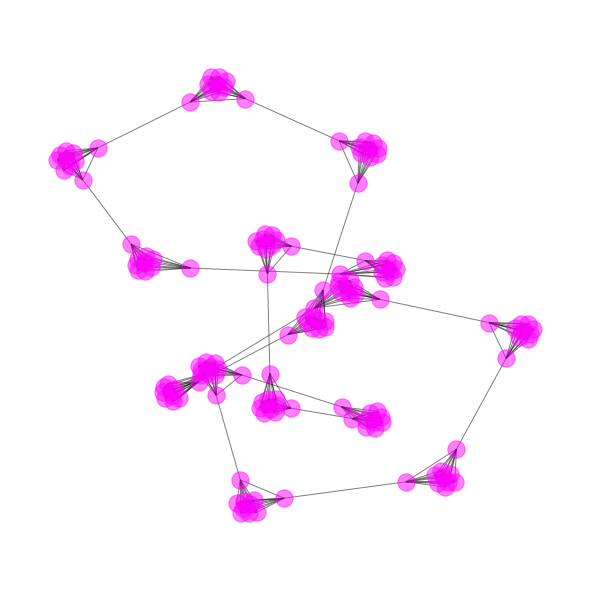

In [5]:
plt.figure(figsize=(8, 8))
G = nx.generators.community.ring_of_cliques(15, 10)
nx.draw_spring(G, node_color='magenta', alpha=0.5)

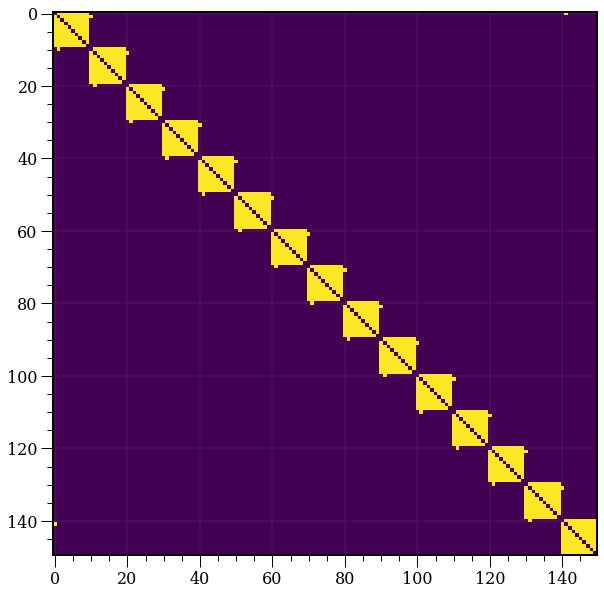

In [6]:
A = nx.adjacency_matrix(G).toarray()
plt.imshow(A)

In [7]:
U, s, Vh = np.linalg.svd(A)
S = np.diag(s)

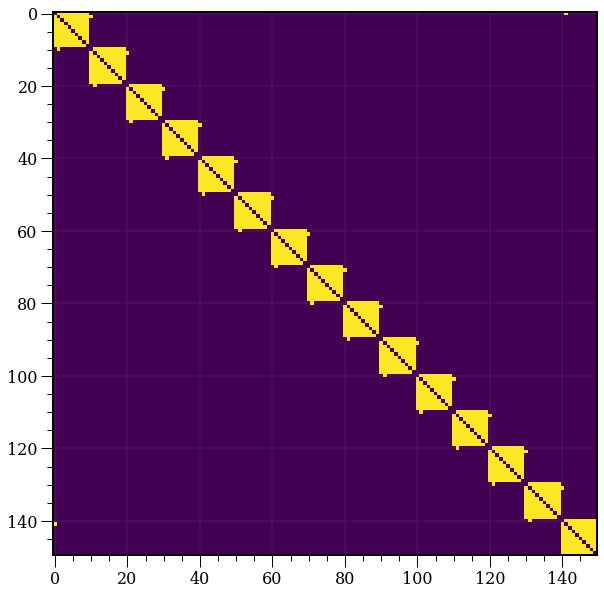

In [8]:
R = U.dot(S).dot(Vh)
plt.imshow(R)

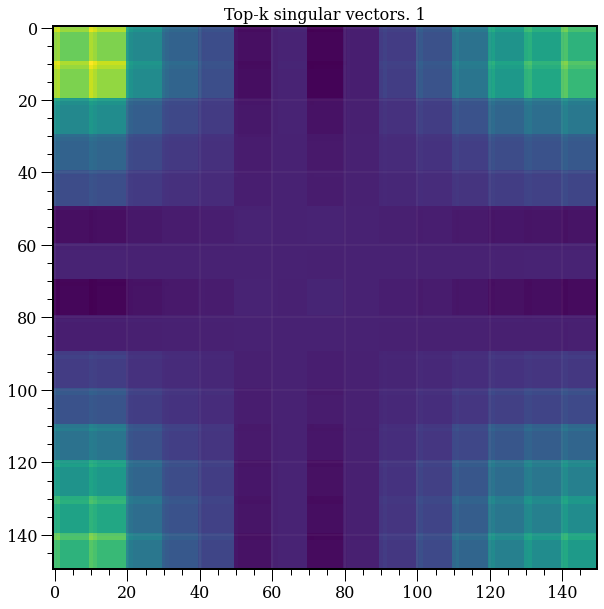

In [9]:
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=1)
plt.title('Top-k singular vectors. {}'.format(1))
T = model.fit_transform(A)
R = model.inverse_transform(T)
plt.imshow(R);

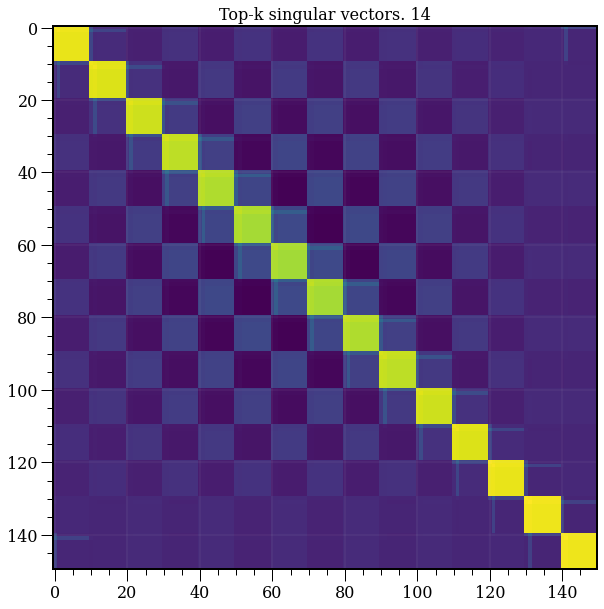

In [10]:
model = TruncatedSVD(n_components=14)
plt.title('Top-k singular vectors. {}'.format(14))
T = model.fit_transform(A)
R = model.inverse_transform(T)
plt.imshow(R);

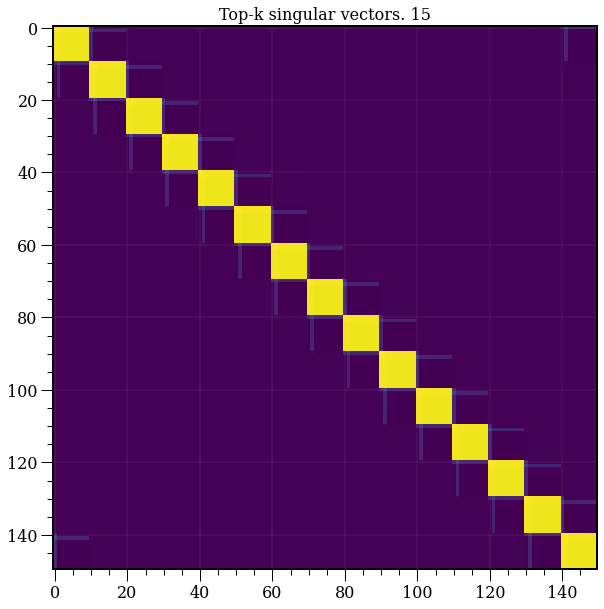

In [11]:
model = TruncatedSVD(n_components=15)
plt.title('Top-k singular vectors. {}'.format(15))
T = model.fit_transform(A)
R = model.inverse_transform(T)
plt.imshow(R);

In [12]:
from IPython.display import HTML
from matplotlib import animation

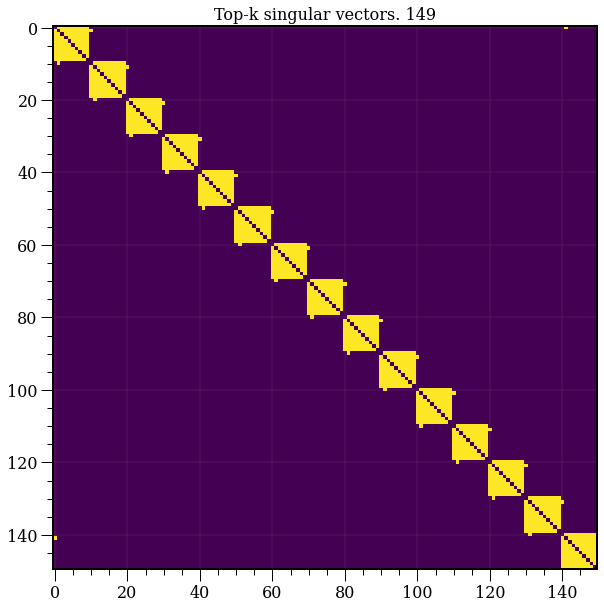

In [13]:
def plot(k):
    plt.cla()
    model = TruncatedSVD(n_components=k+1)
    plt.title('Top-k singular vectors. {}'.format(k+1))
    T = model.fit_transform(A)
    R = model.inverse_transform(T)
    plt.imshow(R)
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, plot, len(A)-1)
HTML(ani.to_html5_video())

## SVD em Texto

In [14]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/24-Decomposicao/fixed_comments.csv', sep='\t')
del df['Unnamed: 0']
df.head()

id  created_time   media_code owner_username  \
0  17842640887345362    1547342805  Bsjbn9igpY1   alitawiiiiil   
1  17842690399347336    1547406553  Bsk53uml3PU      tommypazz   
2  17842728391347487    1547379803  Bsknsm4HUzX    dudhyanth85   
3  17842732198347154    1547387905  Bskx3OuHrR_    scilliaanna   
4  17842740721347584    1547392787  Bsk8XtWAf4H      davipinna   

           mentioned_usernames  tags  
0                         ['']  ['']  
1  ['thegirlwiththeironfists']  ['']  
2                         ['']  ['']  
3                         ['']  ['']  
4                         ['']  ['']

In [15]:
from collections import defaultdict

users = {}
tags = {}
mentions = defaultdict(int)

pop_tags = defaultdict(int)
pop_users = defaultdict(int)

for user, tags_str in df[['owner_username', 'tags']].values:
    for tag in tags_str[1:-1].replace("'", "").strip().split(','):
        if tag.strip():
            for cleaned in tag.split('#'):
                cleaned = cleaned.strip()
                if user not in users:
                    users[user] = len(users)
                if cleaned not in tags:
                    tags[cleaned] = len(tags)
                mentions[user, cleaned] += 1
                pop_tags[cleaned] += 1
                pop_users[user] += 1
                
inverse_users = dict((v, k) for k, v in users.items())
inverse_tags = dict((v, k) for k, v in tags.items())

In [16]:
from scipy import sparse as sp

X = sp.lil_matrix((len(users), len(tags)))
for user, tag in mentions:
    X[users[user], tags[tag]] = np.log10(mentions[user, tag] + 1)
X = X.tocsr()

In [17]:
def print_top_words(model, feature_names):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print()

In [18]:
model = TruncatedSVD(n_components=20)
model.fit_transform(X)
print_top_words(model, inverse_tags)

Topic #0: fashion style photooftheday love instagood ootd picoftheday outfit beautiful outfitoftheday
Topic #1: ootd outfitoftheday fashionista lookoftheday lookbook fashion fashiongram outfit ootdshare whatiwore
Topic #2: foodporn napolifoodporn napoli italyfoodporn food puokemed pizza instafood foodblogger foodie
Topic #3: igersitalia ig_italia italia whatitalyis italy italian_places italiainunoscatto instaitalia ilikeitaly roma
Topic #4: valespo valespotour velespo catania valessi napoli valerio angel sespo valespi
Topic #5: likeforlike follow4follow follow igers f4f like4like likeforfollow whatiworetoday likeforlikes whatiwore
Topic #6: fitness love fit workout motivation gym whatiwore whatiworetoday bodybuilding ootdshare
Topic #7: instagood picoftheday instamood instafashion instadaily pretty fashionista bestoftheday instacool igdaily
Topic #8: love milano italy napoli amore milan roma naples frasi inspiration
Topic #9: frasi leggere libri aforismi citazioni amore parole poetry p

## SVD em Áudio

Escute o aúdio abaixo, quantos timbres diferentes você consegue identificar?*

Como você já deve ter percebido, o aúdio é um pequeno trecho de uma bateria.
Você deve ouvir ao menos três timbres:

1. Um bumbo, fazendo "tu"
1. Uma caixa, fazendo "pa"
1. Um chimbal, fazendo "ts"

O interessante da bateria é que o momento qual cada tambor ou prato é tocado fica bem ressaltado, vide o plot abaixo.

In [19]:
! wget --no-check-certificate http://dcc.ufmg.br/~flaviovdf/mir/examples/drum.wav

--2022-07-04 13:07:22--  http://dcc.ufmg.br/~flaviovdf/mir/examples/drum.wav
Resolving dcc.ufmg.br (dcc.ufmg.br)... 150.164.0.135
Connecting to dcc.ufmg.br (dcc.ufmg.br)|150.164.0.135|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dcc.ufmg.br/~flaviovdf/mir/examples/drum.wav [following]
--2022-07-04 13:07:22--  https://dcc.ufmg.br/~flaviovdf/mir/examples/drum.wav
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Connecting to dcc.ufmg.br (dcc.ufmg.br)|150.164.0.135|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://homepages.dcc.ufmg.br/~flaviovdf/mir/examples/drum.wav [following]
--2022-07-04 13:07:22--  https://homepages.dcc.ufmg.br/~flaviovdf/mir/examples/drum.wav
Resolving homepages.dcc.ufmg.br (homepages.dcc.ufmg.br)... 150.164.0.136
Connecting to homepages.dcc.ufmg.br (homepages.dcc.ufmg.br)|150.164.0.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338732 (331K) [audi

In [20]:
import librosa
import librosa.display
import IPython.display as ipd
wav, sr = librosa.load('drum.wav')
ipd.Audio(wav, rate=sr)

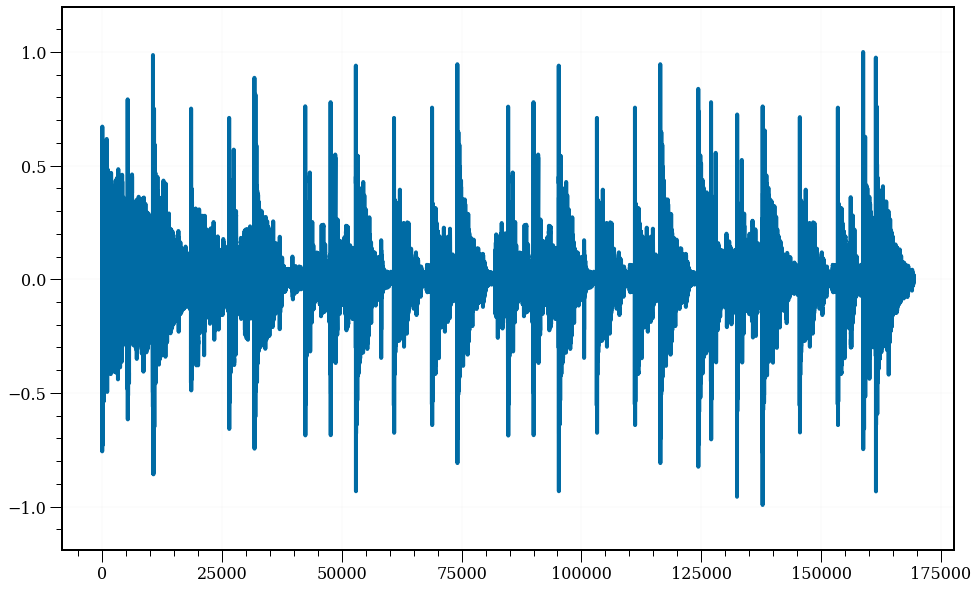

In [21]:
plt.plot(wav);

### SVD como um problema de otimização

Agora voltando para SVD. Observe como o espectrograma é uma matriz de valores complexas (vide slides).

In [22]:
S = librosa.stft(wav)
S[1, 0]

(10.508328+0.7458785j)

In [23]:
S.real

array([[-1.0217804e+01, -4.2669902e+00,  8.5735732e-01, ...,
         2.8654882e-03,  2.0271653e-02,  7.3598772e-02],
       [ 1.0508328e+01, -9.2004836e-01, -5.0310057e-01, ...,
        -2.0415775e-02,  2.5208871e-04, -1.3964828e-02],
       [-1.3302649e+01,  5.7067213e+00,  2.2181463e+00, ...,
         1.9810859e-02,  1.6776076e-02, -8.2778484e-02],
       ...,
       [-3.6144343e-03,  1.8340437e-03,  5.5644057e-05, ...,
         2.5990506e-05,  2.5369343e-04, -1.1420063e-03],
       [ 3.5729280e-03, -4.7158138e-04, -2.3402879e-04, ...,
        -1.9609588e-04, -1.9089393e-04, -6.0880888e-04],
       [-3.4242067e-03, -1.1065764e-03,  3.5329279e-04, ...,
         3.1900464e-04,  4.6339084e-04,  1.6451691e-03]], dtype=float32)

In [24]:
S.imag

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.45878518e-01,  5.37424612e+00, -2.40619093e-01, ...,
        -5.81824174e-03,  1.17106745e-02,  4.83954363e-02],
       [ 2.38943230e-02,  2.91091657e+00, -4.18579519e-01, ...,
         3.12329270e-02, -3.98629867e-02, -3.16173304e-03],
       ...,
       [ 4.81380150e-04,  1.28406327e-05, -2.96440732e-04, ...,
        -1.33546608e-04,  2.36461110e-05,  1.00734876e-03],
       [-4.07548767e-04, -1.86706556e-03,  3.75182688e-04, ...,
        -8.70139629e-05,  1.47516732e-06, -1.18747598e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype=float32)

Como é comum, vamos trabalhar na norma do número complexo. Assim, fazemos uso de `np.abs` para pegar tal norma. Isto é, sendo $z$ o valor complexo, $z = a + i\cdot b$, então sua norma é $|z| = \sqrt{a^2 + b^2}$.

Vamos guardar também o ângulo. Teremos um uso para o mesmo no futuro.

In [25]:
X = np.abs(S)
A = np.angle(S)

In [26]:
def plot_spec(X, fig=None, ax=None, color=True):
    '''Aqui X tem que ser o absoluto'''

    if fig is None and ax is None:
        fig, ax = plt.subplots()

    X_db = librosa.amplitude_to_db(X, ref=np.max)
    img = librosa.display.specshow(X_db, x_axis='time', y_axis='log', ax=ax)
    if color:
        fig.colorbar(img, ax=ax, format="%+2.f dB");

/tmp/ipykernel_23609/2223863282.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax, format="%+2.f dB");


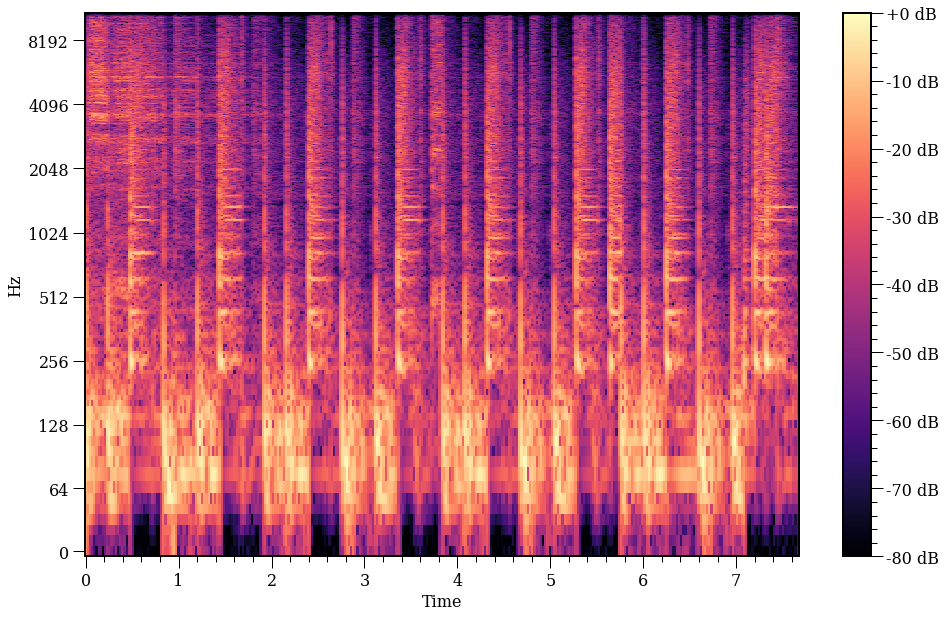

In [27]:
plot_spec(X);

Agora vamos decompor o espectrograma. A bateria tem uma série de informação que se repete, abaixo tentei ressaltar algumas partes.

![](https://dcc.ufmg.br/~flaviovdf/mir/lab08/figs/fig3.png)

Parece que algums frequências aparecem mais em alguns tempos. Primeiro temos frequências baixa, depois alta, depois baixa. Tu, pa, tu, pa.... Além disso deve ter um ts, ts, ts constante por aí. O importante é. INFORMAÇÃO REDUNDANTE. Que ferramenta bacana aprendemos para achar tal informação?


## Otimizando SVD


Observe que podemos re-escrever nossa definição de SVD da seguinte forma:

$$ U_s V^{t} - X = \mathbf{0} $$ 

Onde, $\mathbf{0}$ é uma matriz do mesmo tamanho de X, porém composta apenas de zeros. Ora, se a diferença acima é a matriz de zeros, isto quer dizer que a norma dos dois lados (isto vai valer para qualquer norma) tem que ser zero! 

$$ || U_s V^{t} - X || =  || \mathbf{0} || $$ 

Você já deve estar pensando, ok, vou otimizar alguma coisa. Portando, vamos trabalhar com normas *ponto-a-ponto*:

$$ || U_s V^{t} - X ||_{p} =  0 $$

Onde a norma é definida como:

$$|| M \|_{p} = \left( \sum_{i=1}^n \sum_{j=1}^m |a_{i,j}|^p \right)^{1/p}$$

Vamos fazer uso da norma $p=2$ e elevar ao quadrado, tudo é mais fácil ao quadrado. E no fim do dia é um pouco por isso mesmo.

$$ || U_s V^{t} - X ||^2_{2} = \sum_{i=1}^n \sum_{j=1}^m ( (U_s V^{t})_{i,j} - X_{i,j})^2 = 0 $$

Uma soma de quadrados. Que lindo. Conhecemos os dados $X$, nosso espectrograma. Desconhecemos $U_s$ e $V$. Como achar? Deriva, otimiza, seja feliz.

Ao invés de derivar, vamos de sklearn.

In [28]:
from sklearn.decomposition import TruncatedSVD

k = 5
model = TruncatedSVD(n_components=k)

/tmp/ipykernel_23609/2223863282.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax, format="%+2.f dB");


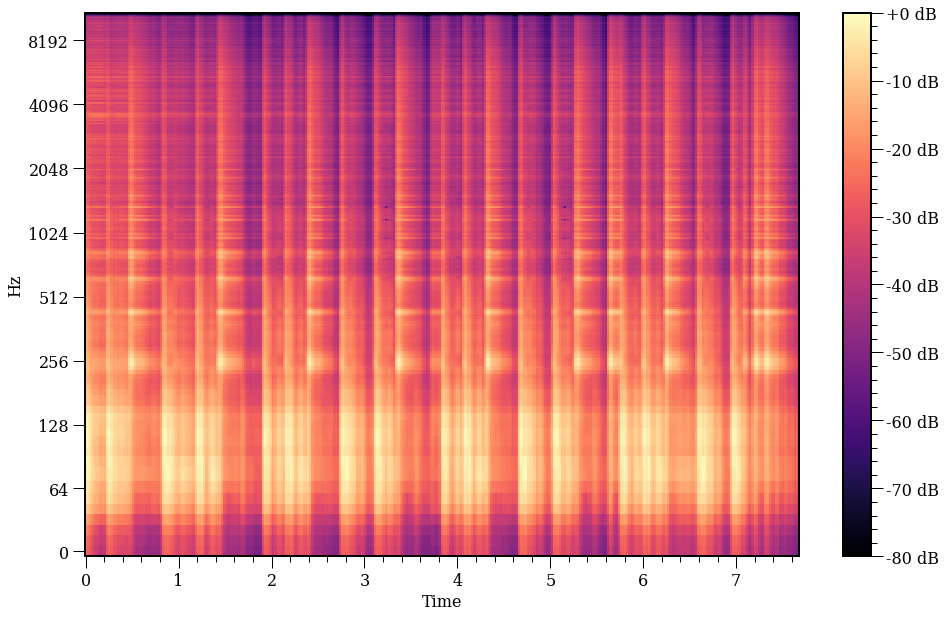

In [29]:
U = model.fit_transform(X)
sigma = np.diag(model.singular_values_)
V = model.components_
plot_spec(U @ sigma @ V);

In [30]:
U = model.fit_transform(X)
sigma = np.diag(model.singular_values_)
V = model.components_

def recover_from_one(U, sigma, V, factor):
    right = U[:, factor][:, np.newaxis]
    s = sigma[factor, factor]
    left = V[factor][np.newaxis]
    return (right @ left) * s

/tmp/ipykernel_23609/2223863282.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax, format="%+2.f dB");


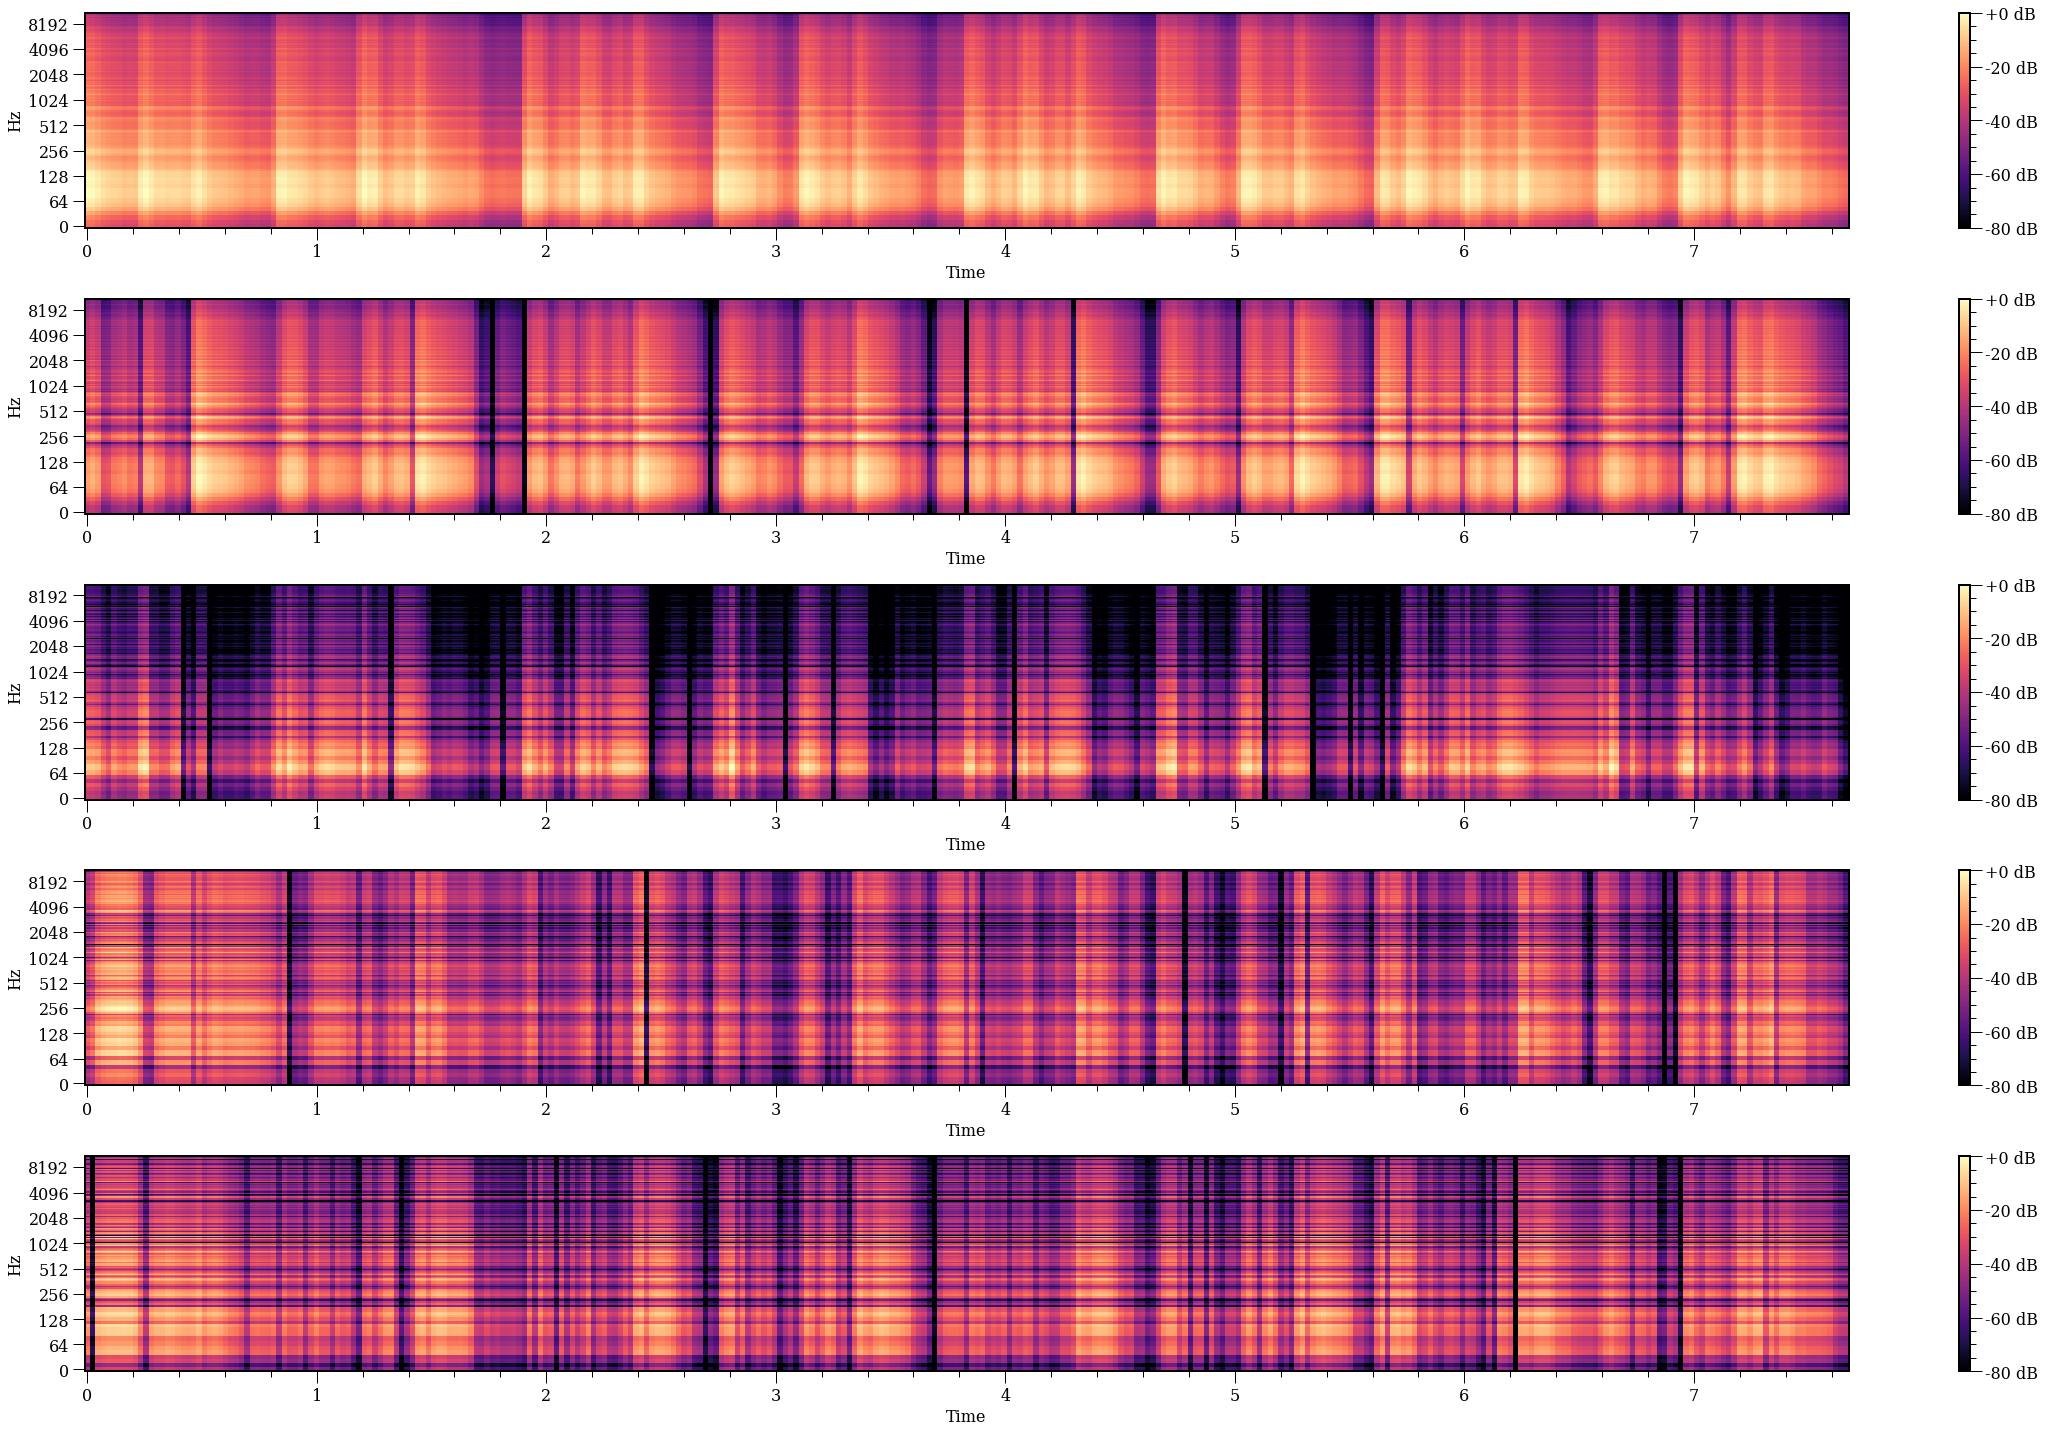

In [31]:
fig, axes = plt.subplots(k, 1, figsize=(32, 20))
for i in range(k):
    X_model = recover_from_one(U, sigma, V, i)
    plot_spec(X_model, fig, axes[i])
fig.tight_layout()

In [32]:
X_model = recover_from_one(U, sigma, V, 0)
S_model = X_model * np.exp(1j * A)
wav_model = librosa.istft(np.asarray(S_model))
ipd.Audio(wav_model, rate=sr)

In [33]:
X_model = recover_from_one(U, sigma, V, 1)
S_model = X_model * np.exp(1j * A)
wav_model = librosa.istft(np.asarray(S_model))
ipd.Audio(wav_model, rate=sr)

In [34]:
X_model = recover_from_one(U, sigma, V, 2)
S_model = X_model * np.exp(1j * A)
wav_model = librosa.istft(np.asarray(S_model))
ipd.Audio(wav_model, rate=sr)

In [35]:
X_model = recover_from_one(U, sigma, V, 2)
S_model = X_model * np.exp(1j * A)
wav_model = librosa.istft(np.asarray(S_model))
ipd.Audio(wav_model, rate=sr)

In [36]:
X_model = recover_from_one(U, sigma, V, 4)
S_model = X_model * np.exp(1j * A)
wav_model = librosa.istft(np.asarray(S_model))
ipd.Audio(wav_model, rate=sr)

## PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/24-Decomposicao/capes-cacc.csv', index_col=3).fillna(0)
del df['Programa']
del df['Instituição']
nivel = df['Nível']
del df['Nível']
df = pd.get_dummies(df, columns=['Tem doutorado'], drop_first=False)
df.head()

Docentes colaboradores  Docentes permanentes  Docentes visitantes  \
Sigla                                                                      
UFAM                     0.25                 24.75                  0.0   
UFPA                     5.50                 14.00                  0.0   
UFMA                     3.00                 10.00                  0.0   
UEMA                     6.25                 14.00                  0.0   
FUFPI                    1.75                  9.50                  0.0   

       Resumos em conf  Resumos expandidos em conf  Artigos em conf  \
Sigla                                                                 
UFAM                20                          25              390   
UFPA                23                          24              284   
UFMA                15                           7              115   
UEMA                 5                          10               73   
FUFPI                4                           1              150   

       Dissertacoes  Teses  periodicos_A1  periodicos_A2  ...  \
Sigla                                                     ...   
UFAM          108.0   14.0             15             19  ...   
UFPA           77.0    0.0             19             21  ...   
UFMA           50.0    0.0              5             11  ...   
UEMA           25.0    0.0              1              1  ...   
FUFPI          31.0    0.0              7              4  ...   

       per_comaluno_A2  per_comaluno_B1  per_comaluno_B2  per_comaluno_B3  \
Sigla                                                                       
UFAM               5.0              4.0              0.0              2.0   
UFPA               5.0              2.0              1.0              2.0   
UFMA               5.0              5.0              1.0              0.0   
UEMA               0.0              2.0              0.0              1.0   
FUFPI              2.0              2.0              0.0              0.0   

       per_comaluno_B4  per_comaluno_B5  per_comaluno_C   per_comaluno_NA  \
Sigla                                                                       
UFAM               0.0              5.0              6.0              6.0   
UFPA               0.0              0.0              5.0             14.0   
UFMA               0.0              4.0              3.0              2.0   
UEMA               0.0              0.0              1.0              2.0   
FUFPI              2.0              8.0              2.0              9.0   

       Tem doutorado_Não  Tem doutorado_Sim  
Sigla                                        
UFAM                   0                  1  
UFPA                   0                  1  
UFMA                   1                  0  
UEMA                   1                  0  
FUFPI                  1                  0  

[5 rows x 28 columns]

In [39]:
Z = (df - df.mean()) / df.std(ddof=1)
Z

Docentes colaboradores  Docentes permanentes  \
Sigla                                                        
UFAM                       -0.942673              0.366255   
UFPA                        0.380598             -0.503534   
UFMA                       -0.249531             -0.827176   
UEMA                        0.569636             -0.503534   
FUFPI                      -0.564595             -0.867632   
...                              ...                   ...   
UFMS/UFG                   -1.005685             -0.726038   
UFMS/CA/Prof                0.758675             -0.503534   
UFG                        -0.060492              0.871947   
UNB                        -0.942673              0.265117   
UNB/CA/Prof                 1.262778             -0.442851   

              Docentes visitantes  Resumos em conf  \
Sigla                                                
UFAM                    -0.290455        -0.171810   
UFPA                    -0.290455        -0.060084   
UFMA                    -0.290455        -0.358020   
UEMA                    -0.290455        -0.730440   
FUFPI                   -0.290455        -0.767682   
...                           ...              ...   
UFMS/UFG                 3.340236        -0.618714   
UFMS/CA/Prof            -0.290455        -0.395262   
UFG                      1.524890        -0.209052   
UNB                     -0.290455        -0.246294   
UNB/CA/Prof             -0.290455        -0.879408   

              Resumos expandidos em conf  Artigos em conf  Dissertacoes  \
Sigla                                                                     
UFAM                           -0.255158         0.818448      0.538385   
UFPA                           -0.285247         0.241514      0.050755   
UFMA                           -0.796766        -0.678314     -0.373954   
UEMA                           -0.706498        -0.906911     -0.767204   
FUFPI                          -0.977302        -0.487817     -0.672824   
...                                  ...              ...           ...   
UFMS/UFG                       -0.525962        -0.422504     -1.160454   
UFMS/CA/Prof                   -0.525962        -0.912353     -0.955964   
UFG                            -0.315336        -0.008854      0.444005   
UNB                            -0.646319        -0.014296     -0.216654   
UNB/CA/Prof                    -0.887034        -0.890582     -0.373954   

                 Teses  periodicos_A1  periodicos_A2  ...  per_comaluno_A2  \
Sigla                                                 ...                    
UFAM         -0.018267      -0.227736       0.066281  ...        -0.117974   
UFPA         -0.474934      -0.088021       0.158338  ...        -0.117974   
UFMA         -0.474934      -0.577024      -0.301946  ...        -0.117974   
UEMA         -0.474934      -0.716739      -0.762231  ...        -0.569406   
FUFPI        -0.474934      -0.507166      -0.624145  ...        -0.388833   
...                ...            ...            ...  ...              ...   
UFMS/UFG     -0.018267      -0.262665       0.066281  ...        -0.569406   
UFMS/CA/Prof -0.474934      -0.716739      -0.762231  ...        -0.569406   
UFG          -0.474934      -0.437308      -0.071804  ...        -0.027688   
UNB          -0.050886       0.086623      -0.301946  ...        -0.479120   
UNB/CA/Prof  -0.474934      -0.751668      -0.808259  ...        -0.569406   

              per_comaluno_B1  per_comaluno_B2  per_comaluno_B3  \
Sigla                                                             
UFAM                -0.279284        -0.564571        -0.262590   
UFPA                -0.478772         0.015468        -0.262590   
UFMA                -0.179540         0.015468        -0.630706   
UEMA                -0.478772        -0.564571        -0.446648   
FUFPI               -0.478772        -0.564571        -0.630706   
...                       ...              .

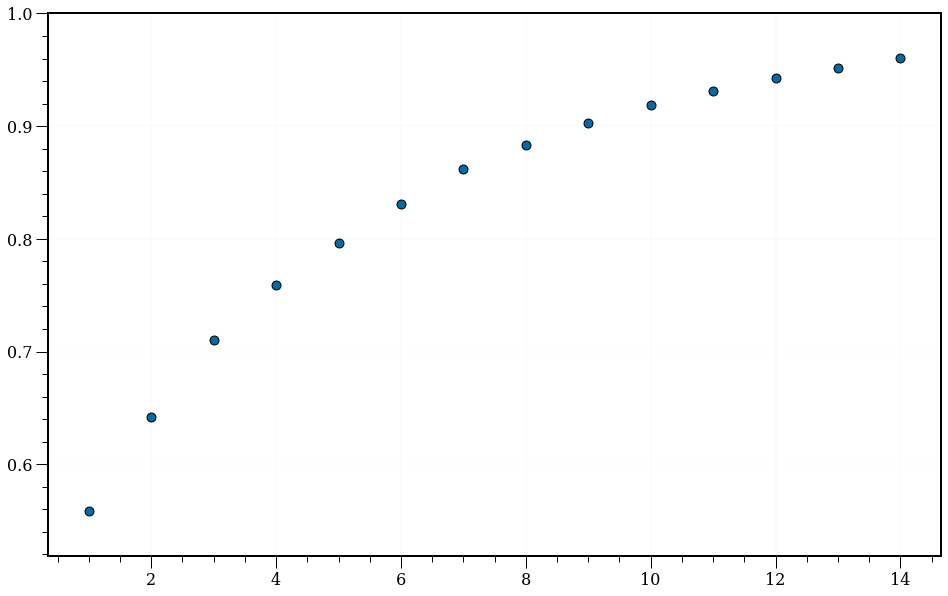

In [40]:
components = list(range(1, 15))
y = []
for k in components:
    pca = PCA(n_components=k)
    pca = pca.fit(Z)
    y.append(pca.explained_variance_ratio_.sum())
plt.scatter(components, y, s=80, edgecolors='k')

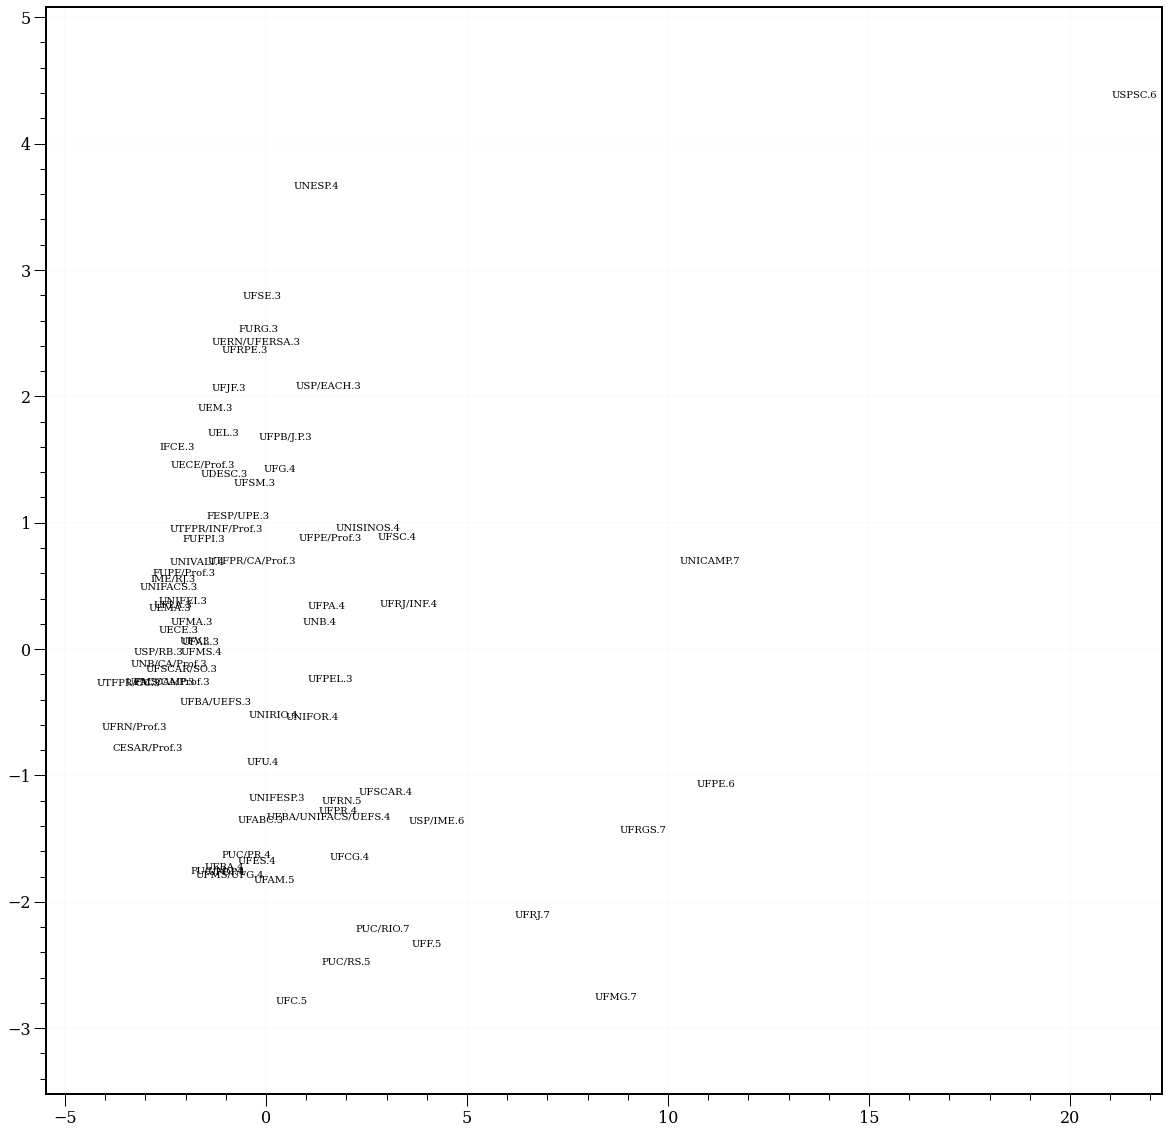

In [41]:
plt.figure(figsize=(20, 20))

pca = PCA(n_components=2)
pca = pca.fit(Z)
N = pca.transform(Z)
plt.scatter(N[:, 0], N[:, 1], s=0, edgecolors='k')
ax = plt.gca()
for i, txt in enumerate(df.index):
    ax.annotate('{}.{}'.format(txt, nivel[i]), (N[:, 0][i], N[:, 1][i]))